In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse

import warnings
warnings.filterwarnings('ignore')


## OLS using Ridge, ElasticNet, Lasso. Analysis of overfitting and model legitimacy

We have talked a lot about the various forms of regression, which are distinct because of their different penalty terms, but I don't believe we have talked too much about what those terms actually are and why we care.

Ridge term: $$( \lambda \sum_{j=1}^{p} \beta_j^2 )$$

Lasso term: $$( \lambda \sum_{j=1}^{p} |\beta_j|)$$

ElasticNet term: $$( \lambda_1 \sum_{j=1}^{p} |\beta_j| + \lambda_2 \sum_{j=1}^{p} \beta_j^2 )$$




Here, Lambda is the term that controls the strength of the penalty, the higher the lambda value, the greater the restraint on the coefficients

Beta represents the coefficients of the model



*   The ridge term is the sum of the squared weights multiplied by lambda

*   The lasso term is the sum of the absolute value of the weights multiplied by lambda

*   The elastic net term is just a combination of the other two penalty terms. In scikit learn and many other places, the ridge term is sometimes scaled by .5, so we will do that here


In [ ]:
def ridge_term(alpha, lambda_val, beta):
    return alpha * (lambda_val * np.sum(beta**2))

In [ ]:
def lasso_term(alpha, lambda_val, beta):
    return alpha * ((lambda_val * np.sum(np.abs(beta))))

In [ ]:
def enet_term(alpha, lambda_val,beta):
  return (.5*(ridge_term(alpha,lambda_val,beta))+lasso_term(alpha,1-lambda_val,beta))

In [ ]:
#example usage
beta = np.array([0.1, 0.2, 0.3])
print(ridge_term(1,.5,beta))
print(lasso_term(1,.3,beta))
print(enet_term(1,.5,beta))

0.07
0.18000000000000002
0.3350000000000001


Why do we care about the differences in the penalty terms?


The differences in penalty terms lead to different restrictions on how the weights of the model are updated. For example, a very small penalty term has little to no impact on the weights, meaning that a model with a small penalty term could be somewhat prone to overfitting. On the contrary, an overly large penalty term could impose too much of a restriction on the weights, making the model not very accurate because it is not allowed to be specific

In [10]:
from google.colab import files
files = files.upload()

Saving concrete.csv to concrete.csv


In [11]:
conc = pd.read_csv('concrete.csv')
conc.shape

(1030, 9)

In [12]:
conc

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


## Q1: Fit this data using Ridge, Lasso, and ElasticNet from Sklearn. Which of these are most likely to be overfit and underfit, solely based on the penalty term? Use the model coefficients to get the penalty term.

Scale the data and test each of the three regression models on the concrete dataset with strength as the target variable and the rest of the variables as the predictors. Use a test train split to get a training size of .7. Assume an alpha of .01 and an l1 ratio of .5.

## Smoothly Clipped Absolute Deviations

The smoothly clipped absolute deviation (SCAD) penalty was designed to encourage sparse solutions to the least squares problem, while also allowing for large values of β.

A sparse solution is one that attempts to limit the impact of non-useful variables by setting their coefficients to zero, for example:

$$β_j = {[5,0,0,2,0,3,0]}$$


The "smoothly clipped" part means that it doesn't penalize large coefficients in a harsh, abrupt way. Instead, it gradually increases the penalty as the coefficient grows larger, but it also "clips" or limits the penalty once the coefficient reaches a certain threshold. This helps balance between preventing overfitting and allowing the model to capture important patterns in the data.

The "absolute deviation" is the magnitude of the difference between the predicted and observed values. It gives us a measure of how much our model's predictions vary from the actual data, without considering the direction of the difference.

Derivative of SCAD: $$
\begin{cases}
\lambda & \text{if } |\beta| \leq \lambda \\
(\frac{a}{\lambda} - \beta)(a - 1) & \text{if } \lambda < |\beta| \leq a\lambda \\
0 & \text{if } |\beta| > a\lambda
\end{cases}
$$

Piecewise of SCAD: \begin{cases}
\lambda |\beta| & \text{if } |\beta| \leq \lambda \\
a\lambda |\beta| - \frac{\beta^2 - \lambda^2}{a - 1} & \text{if } \lambda < |\beta| \leq a\lambda \\
\frac{\lambda^2}{(a + 1)^2} & \text{if } |\beta| > a\lambda
\end{cases}


## Q2 Design a function that represents the SCAD penalty term and use it to graph the output for a set of betas: np.linspace(-10, 10, 100).
Plot two lines with one lamba at .9 and another at .8

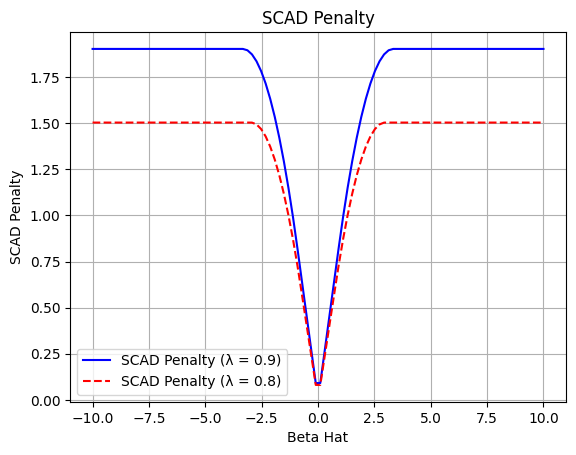

In [8]:
beta_hat_range = np.linspace(-10, 10, 100)
lambda_val = 0.9
a_val = 3.7
lambda_1 = 0.8 #controls how quickly the penalty levels off

scad_values = scad_penalty(beta_hat_range, lambda_val, a_val)
scad_values_1 = scad_penalty(beta_hat_range, lambda_1, a_val)

plt.figure()
plt.plot(beta_hat_range, scad_values, label='SCAD Penalty (λ = 0.9)', color='blue')
plt.plot(beta_hat_range, scad_values_1, label='SCAD Penalty (λ = 0.8)', linestyle='--', color='red')

plt.xlabel('Beta Hat')
plt.ylabel('SCAD Penalty')
plt.title('SCAD Penalty')
plt.legend()
plt.grid(True)
plt.show()